In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
plt.rcParams['font.family']='NanumGothic'

In [14]:
#스케일링을 하고 진행하기(이상치가 존재하기 때문에 standardscaler를 사용)
#train 데이터
train = pd.read_csv('train_encoding.csv')
print(train.columns)
numerical_cols = ['연간 소득', '최대 신용한도','월 상환 부채액','신용 점수']
categorical_cols = ['주거 형태','개설된 신용계좌 수','대출 목적','대출 상환 기간','채무 불이행 여부']
numerical_df = train[numerical_cols]
categorical_df = train[categorical_cols]

Index(['주거 형태', '연간 소득', '개설된 신용계좌 수', '대출 목적', '대출 상환 기간', '최대 신용한도',
       '월 상환 부채액', '신용 점수', '채무 불이행 여부'],
      dtype='object')


In [6]:
data = pd.read_csv('train.csv')
data.columns

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부'],
      dtype='object')

In [ ]:
numeric_col = ['연간 소득','최대 신용한도','현재 대출 잔액', '현재 미상환 신용액', 
                '월 상환 부채액', '신용 점수']
df = data[numeric_col]

In [ ]:
# numerical 컬럼들에 대한 분산팽창인자 값을 확인하여 다중 공선성이 있는지 확인해보기
# 5보다 큰 값인 현재 대출 잔액 및 신용 점수는 피처에서 제외하기
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['feature'] = df.columns
vif

,VIF,feature
0,4.602581,연간 소득
1,2.104665,최대 신용한도
2,5.390104,현재 대출 잔액
3,2.720107,현재 미상환 신용액
4,4.483855,월 상환 부채액
5,5.217970,신용 점수


<Axes: >

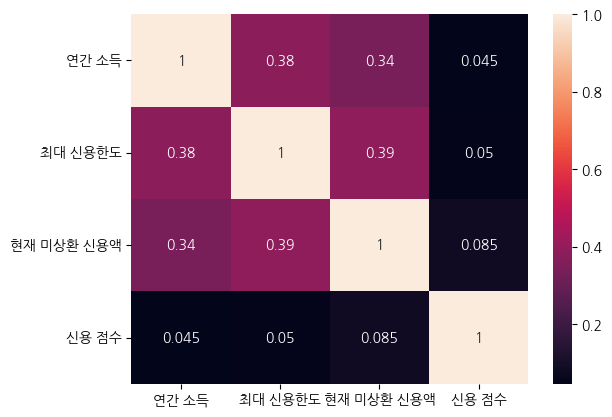

In [11]:
#다중공선성 확인
sns.heatmap(numerical_df.corr(),annot=True)

In [15]:
numerical_df

,연간 소득,최대 신용한도,월 상환 부채액,신용 점수
0,1941337.5,400597.5,8806.5,767
1,1979505.0,360679.5,24961.5,767
2,1356381.0,491770.5,12069.0,800
3,1049017.5,411546.0,31749.0,796
4,4320217.5,895288.5,5862.0,751
...,...,...,...,...
9995,1339473.0,319027.5,6237.0,755
9996,2297230.5,399799.5,53301.0,707
9997,1221523.5,823305.0,11436.0,733
9998,3343584.0,724314.0,25567.5,696


In [16]:
categorical_df

,주거 형태,개설된 신용계좌 수,대출 목적,대출 상환 기간,채무 불이행 여부
0,1,0,1,0,0
1,1,0,1,0,0
2,1,0,1,0,1
3,1,0,1,0,1
4,1,0,1,1,0
...,...,...,...,...,...
9995,0,0,1,0,0
9996,0,0,0,1,0
9997,0,0,1,1,0
9998,1,0,1,0,0


In [50]:
train.columns

Index(['주거 형태', '연간 소득', '개설된 신용계좌 수', '대출 목적', '대출 상환 기간', '최대 신용한도',
       '현재 미상환 신용액', '신용 점수', '채무 불이행 여부'],
      dtype='object')

In [17]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(numerical_df)
scaled_numeric = pd.DataFrame(scaled_train,columns = numerical_cols)
scaled_train = pd.concat([scaled_numeric,categorical_df],axis=1,ignore_index=True)
scaled_train.columns = ['연간 소득', '최대 신용한도',
       '월 상환 부채액', '신용 점수','주거 형태',
       '개설된 신용계좌 수', '대출 목적', 
       '대출 상환 기간','채무 불이행 여부']
scaled_train.head()

,연간 소득,최대 신용한도,월 상환 부채액,신용 점수,주거 형태,개설된 신용계좌 수,대출 목적,대출 상환 기간,채무 불이행 여부
0,-0.155206,-0.482924,-0.892995,0.399787,1,0,1,0,0
1,-0.128597,-0.507808,0.170833,0.399787,1,0,1,0,0
2,-0.563024,-0.426087,-0.678155,0.978807,1,0,1,0,1
3,-0.777310,-0.476099,0.617798,0.908623,1,0,1,0,1
4,1.503292,-0.174536,-1.086894,0.119050,1,0,1,1,0


In [19]:
numerical_cols

['연간 소득', '최대 신용한도', '월 상환 부채액', '신용 점수']

In [22]:
#test 데이터
test = pd.read_csv('test_encoding.csv')
print(test.columns)
test_numeric = test[numerical_cols]
test_categorical = test[categorical_cols[:-1]]
scaler_test = StandardScaler()
test_numeric_scaled = pd.DataFrame(scaler_test.fit_transform(test_numeric),columns=test_numeric.columns)
scaled_test = pd.concat([test_numeric_scaled,test_categorical],axis=1,ignore_index=True)
scaled_test.columns = ['연간 소득', '최대 신용한도',
       '월 상환 부채액', '신용 점수','주거 형태',
       '개설된 신용계좌 수', '대출 목적', 
       '대출 상환 기간']
scaled_test.head()

Index(['주거 형태', '연간 소득', '개설된 신용계좌 수', '대출 목적', '대출 상환 기간', '최대 신용한도',
       '월 상환 부채액', '신용 점수'],
      dtype='object')


,연간 소득,최대 신용한도,월 상환 부채액,신용 점수,주거 형태,개설된 신용계좌 수,대출 목적,대출 상환 기간
0,-0.473105,-0.050880,0.088907,-0.396419,1,0,0,0
1,-0.054064,-0.044096,-0.471728,-0.745369,0,0,1,1
2,0.235870,-0.011080,-0.887485,-0.667824,0,0,1,1
3,-0.464608,-0.042439,-0.972196,0.107620,0,0,1,0
4,0.090870,0.065195,0.840850,0.359640,0,1,1,0


In [23]:
# 스케일링 진행 후 규제 회귀를 적용한 모델 제출하기, lasso L1 규제 적용, 릿지는 기본값
train_x = train.iloc[:,:-1].values
train_y = train.iloc[:,-1].values
model = xgboost.XGBClassifier(n_estimators=500,random_state=42)
model.fit(train_x,train_y)
y_prob = model.predict_proba(test)
y_prob

array([[0.89952326, 0.10047674],
       [0.89251715, 0.10748285],
       [0.575493  , 0.424507  ],
       ...,
       [0.53046757, 0.46953243],
       [0.76841545, 0.23158456],
       [0.5457804 , 0.45421958]], shape=(2062, 2), dtype=float32)

In [28]:
# 스케일링 진행 후 규제 회귀를 적용한 모델 제출하기, lasso L1 규제 적용, 릿지는 기본값
train_x = train.iloc[:,:-1].values
train_y = train.iloc[:,-1].values
model = LogisticRegression(class_weight ='balanced')
model.fit(train_x,train_y)
y_prob = model.predict_proba(test)
y_prob

c:\Users\fursew\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[0.67250535, 0.32749465],
       [0.38463187, 0.61536813],
       [0.41117022, 0.58882978],
       ...,
       [0.39026702, 0.60973298],
       [0.54167262, 0.45832738],
       [0.29863934, 0.70136066]], shape=(2062, 2))

In [29]:
submit = pd.read_csv('sample_submission.csv')

# 결과 저장
submit['채무 불이행 확률'] = y_prob[:,-1]
submit.to_csv('submission.csv', encoding='UTF-8-sig', index=False)

In [63]:
np.exp(model.coef_)

array([[0.99999985, 0.99999978, 1.00000049, 1.00000081, 1.00000087,
        0.99999998, 1.00000035, 0.99957486]])